In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from Myfunc import *
import warnings
warnings.filterwarnings('ignore')


In [6]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size']= 10

In [7]:
data = pd.read_csv(r'D:\computer_statistic\data\SampleData\SampleData\ACG.csv',index_col=0,parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3201 entries, 2005-02-25 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     3201 non-null   float64
 1   High     3201 non-null   float64
 2   Low      3201 non-null   float64
 3   Close    3201 non-null   float64
 4   Volume   3201 non-null   int64  
 5   OpenInt  3201 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 175.1 KB


In [8]:
data['Close']

Date
2005-02-25    13.693
2005-02-28    13.827
2005-03-01    13.760
2005-03-02    13.810
2005-03-03    13.630
               ...  
2017-11-06    95.550
2017-11-07    95.560
2017-11-08    95.450
2017-11-09    95.910
2017-11-10    95.350
Name: Close, Length: 3201, dtype: float64

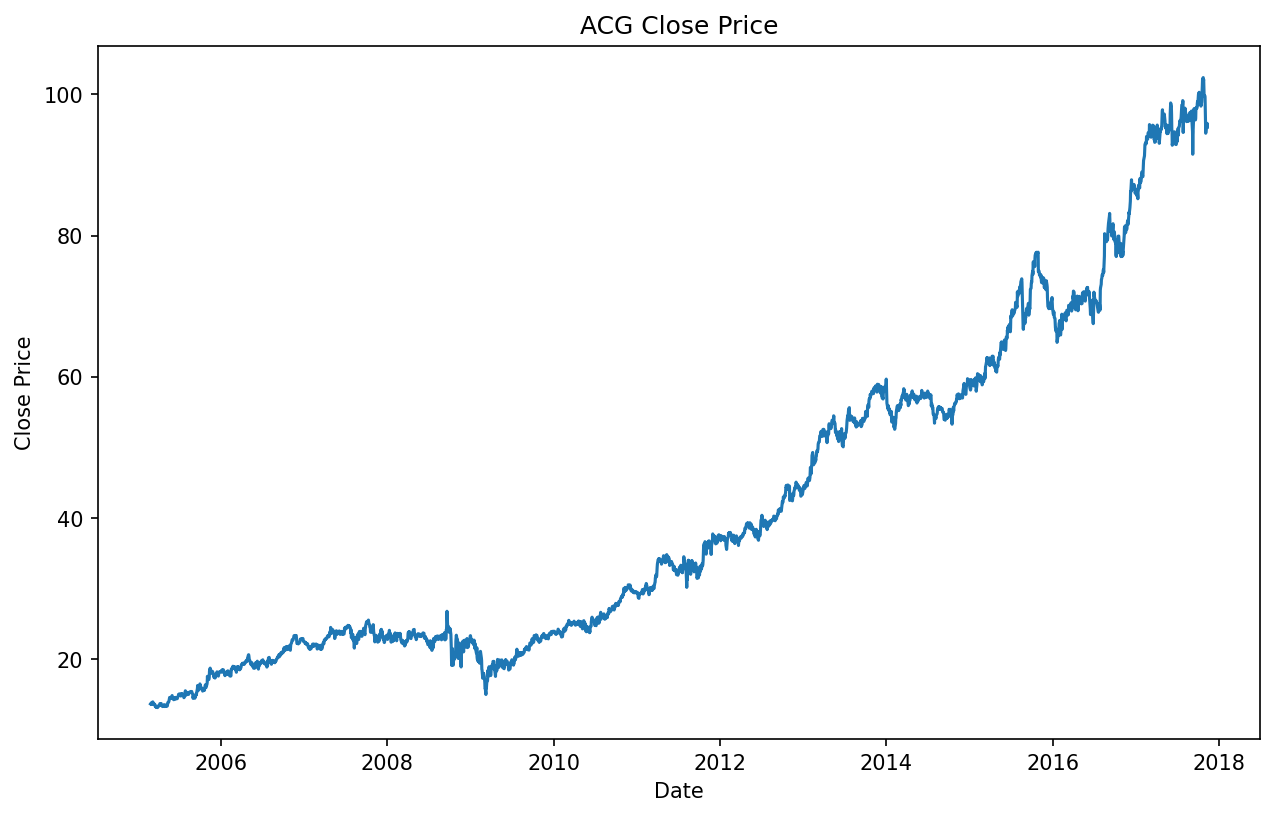

In [9]:
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ACG Close Price')
plt.show()

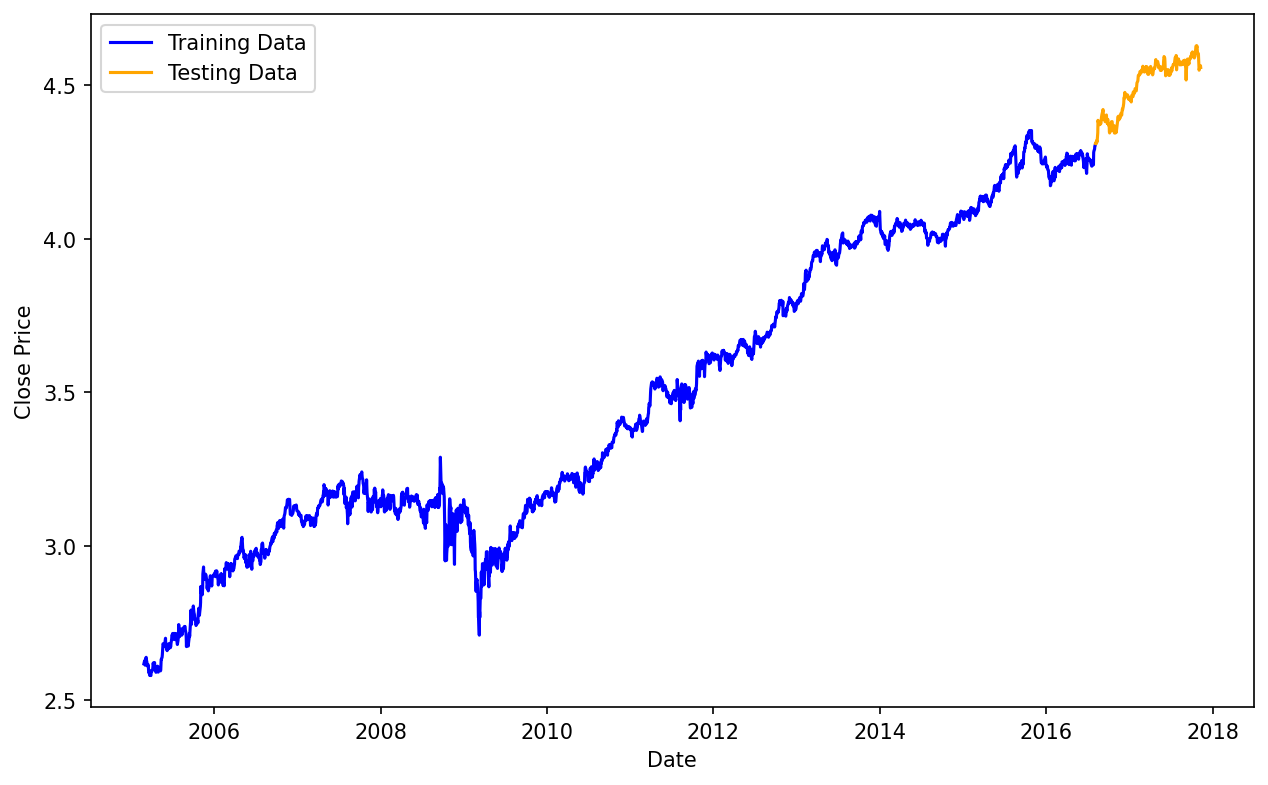

In [10]:
log_data = np.log(data['Close'])

train_data, test_data = log_data[:int(len(log_data)*0.9)], log_data[int(len(log_data)*0.9):]
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train_data,'blue', label='Training Data')
plt.plot(test_data,'orange', label='Testing Data')
plt.legend()

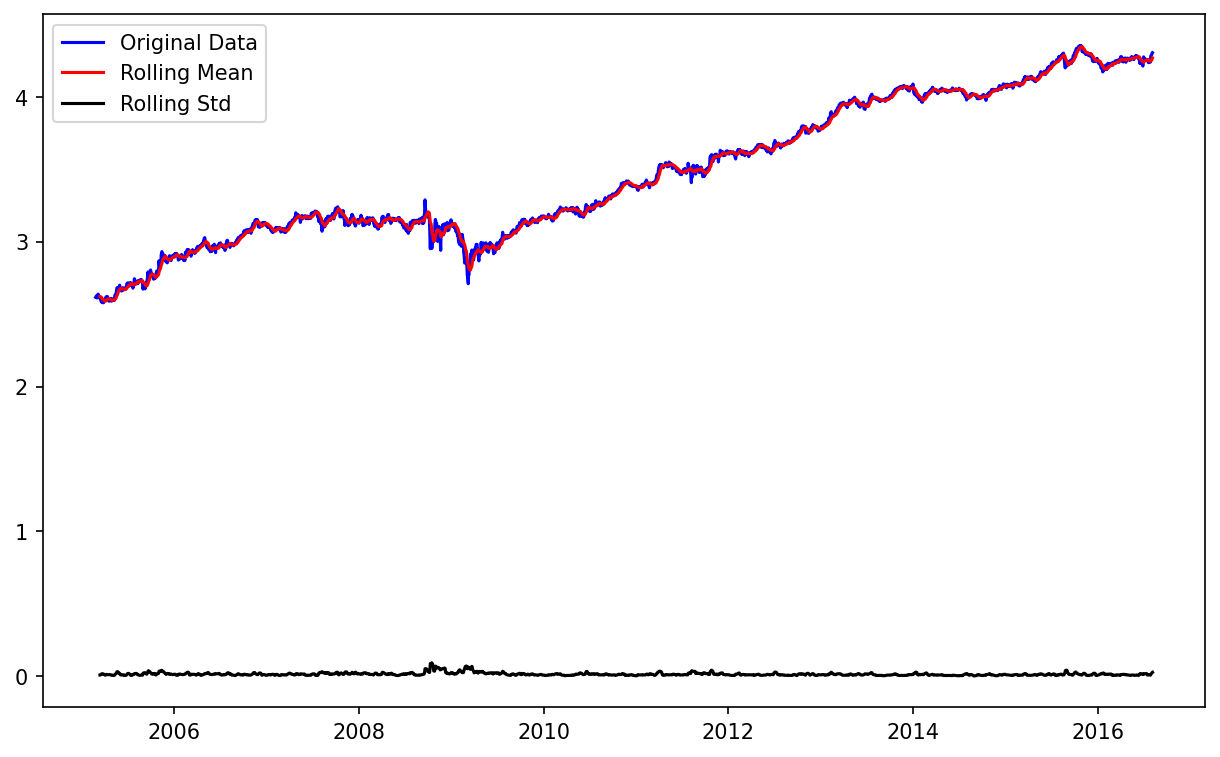

In [11]:
rolmean = train_data.rolling(12).mean()
rolstd = train_data.rolling(12).std()
plt.plot(train_data, 'blue', label='Original Data')
plt.plot(rolmean, 'red', label='Rolling Mean')
plt.plot(rolstd, 'black', label='Rolling Std')
plt.legend()
plt.show()

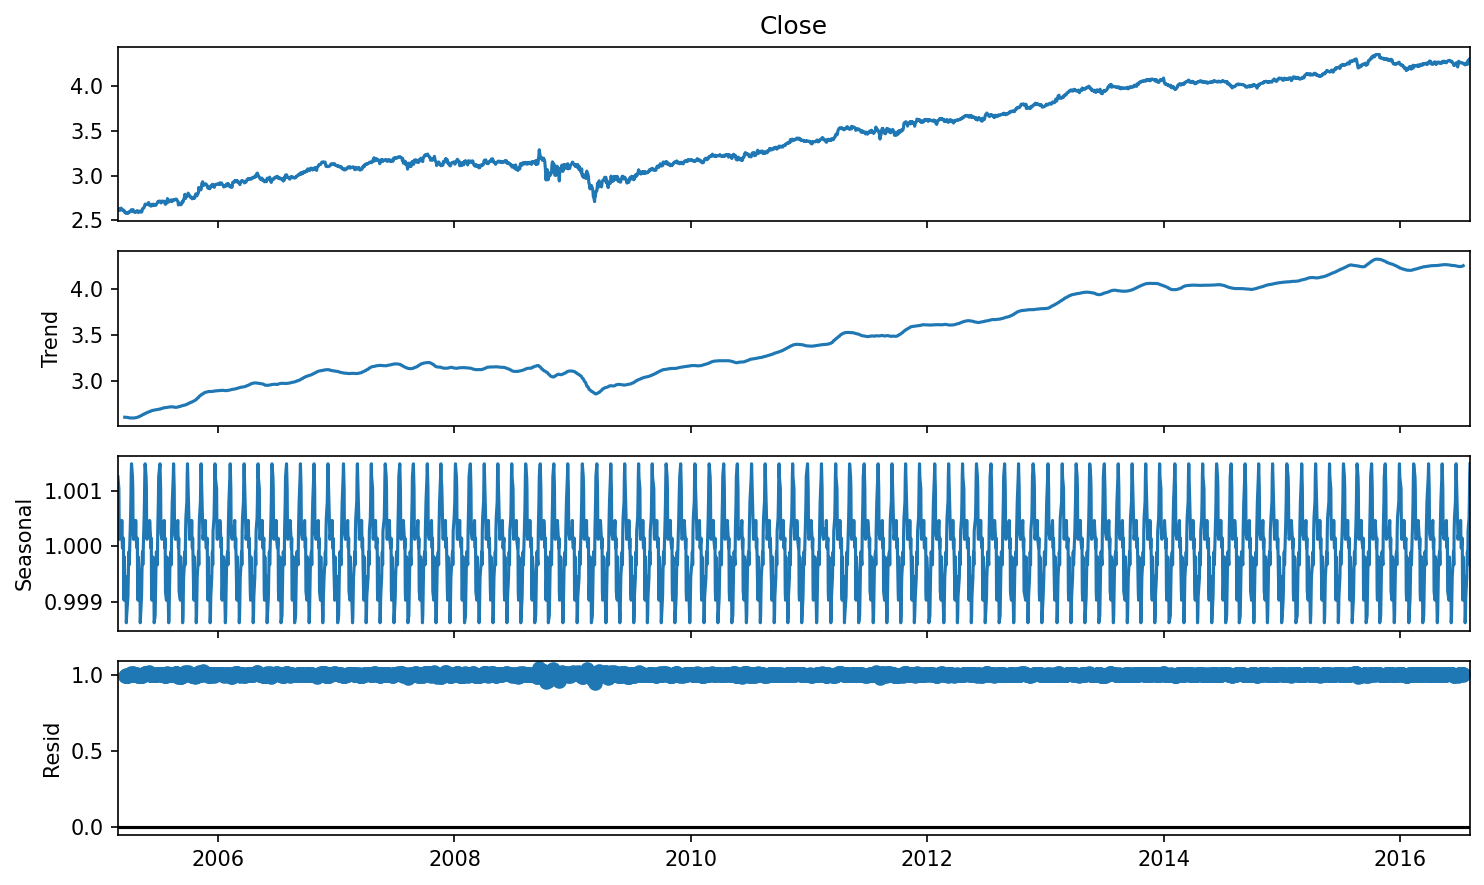

In [12]:
decompose_result = seasonal_decompose(train_data, model='multiplicative', period=30)
decompose_result.plot()
plt.show()

In [13]:
train_data

Date
2005-02-25    2.616885
2005-02-28    2.626623
2005-03-01    2.621766
2005-03-02    2.625393
2005-03-03    2.612273
                ...   
2016-07-29    4.285240
2016-08-01    4.291965
2016-08-02    4.301494
2016-08-03    4.302307
2016-08-04    4.305146
Name: Close, Length: 2880, dtype: float64

In [15]:
print(adf_test(train_data))

print(kpss_test(train_data))  

fail to reject the null hypothesis (H0), 
the data is non-stationary.
ADF: Test Statistic         -0.737048
p value                      0.836918
# of Lags                   15.000000
# of Observations         2864.000000
Critical Value ({key})      -2.567307
dtype: float64
reject the null hypothesis (H0), 
the data is non-stationary.
KPSS: Test Statistic       8.63507
p value                    0.01000
# of Lags                 31.00000
Critical Value ({key})     0.73900
dtype: float64


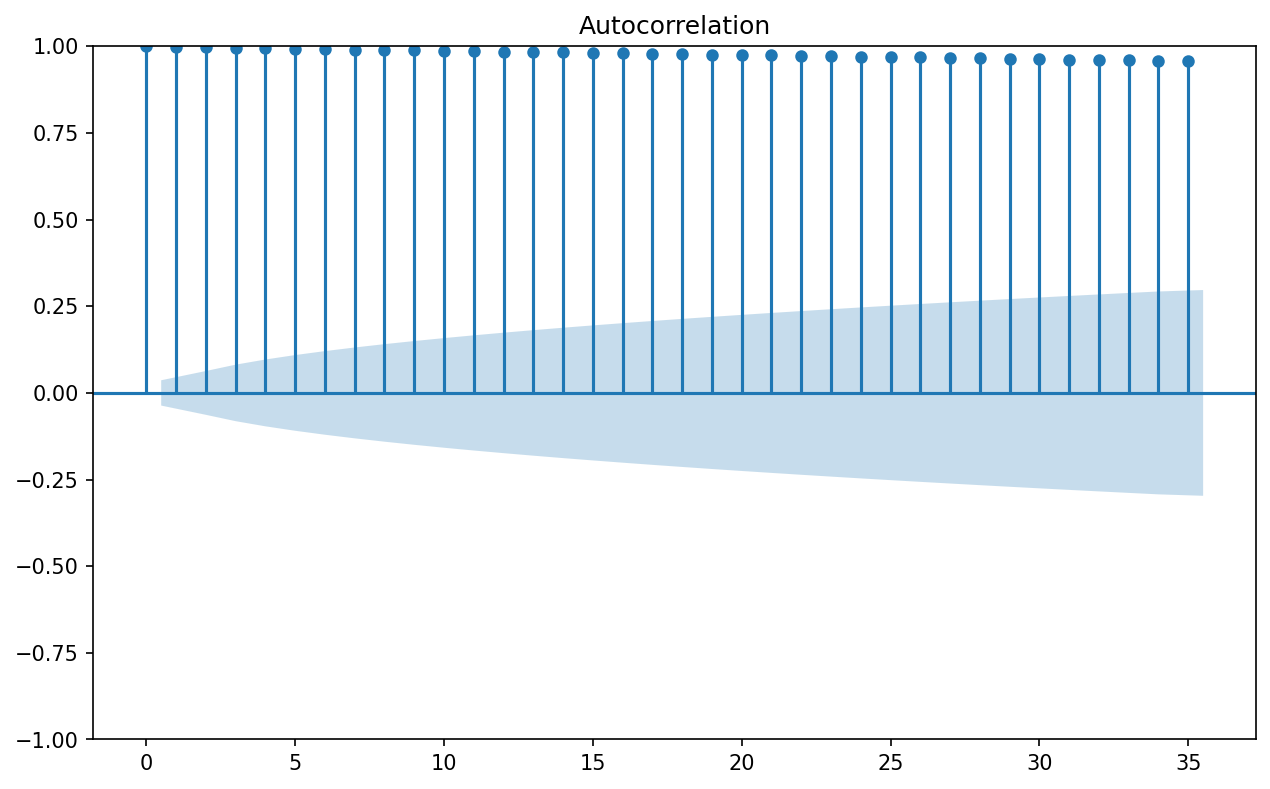

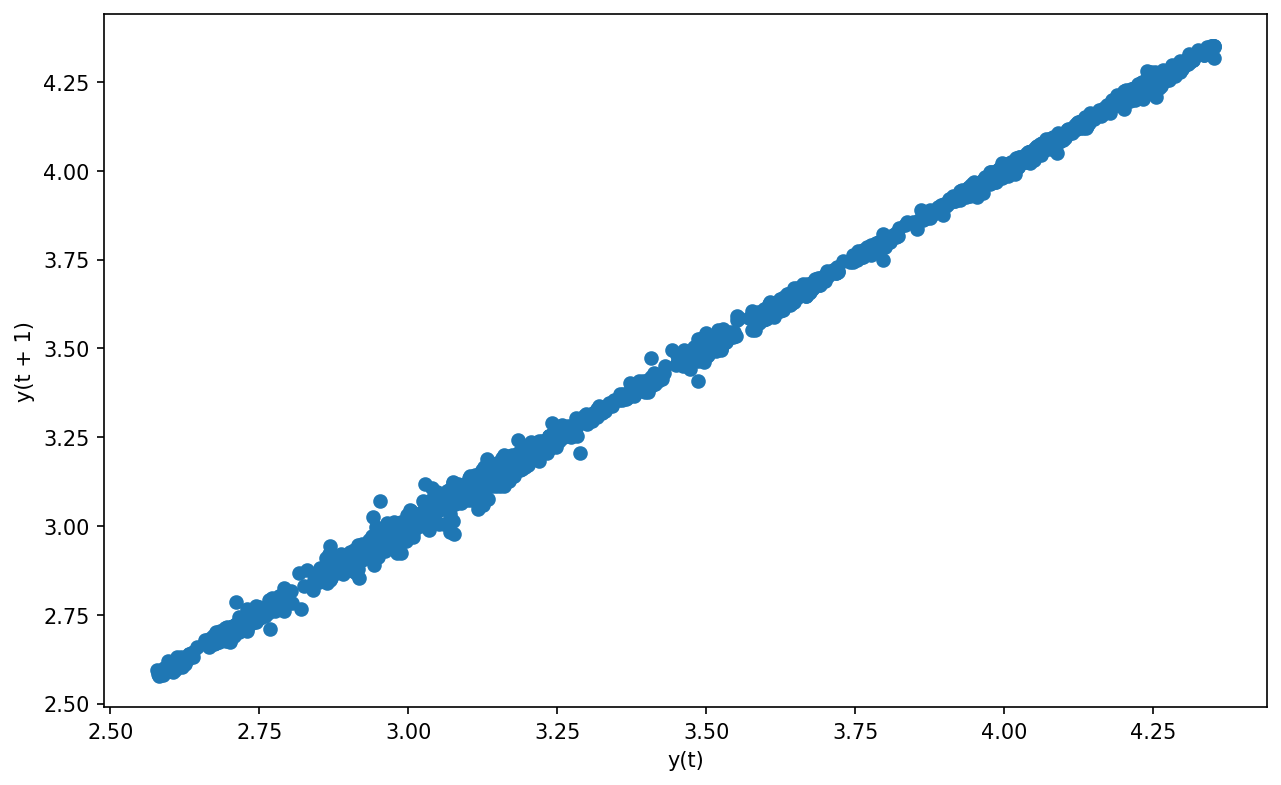

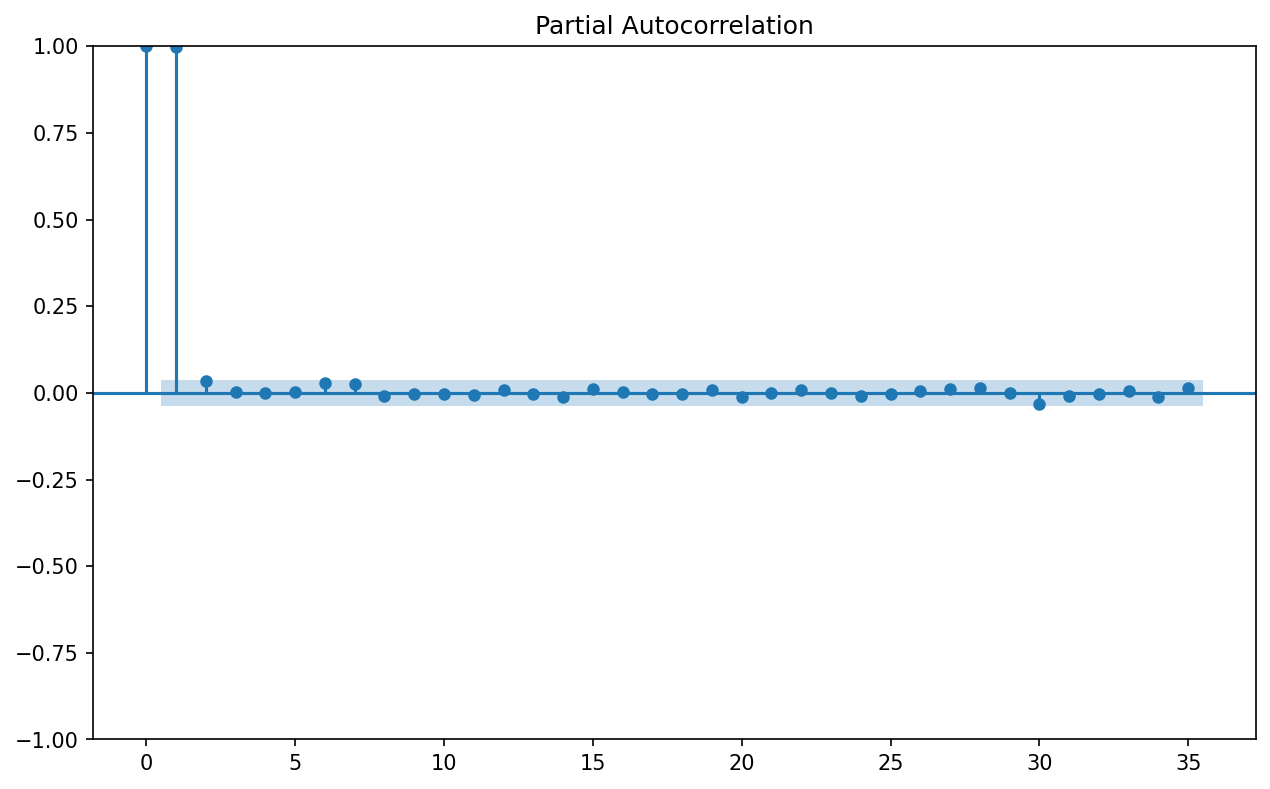

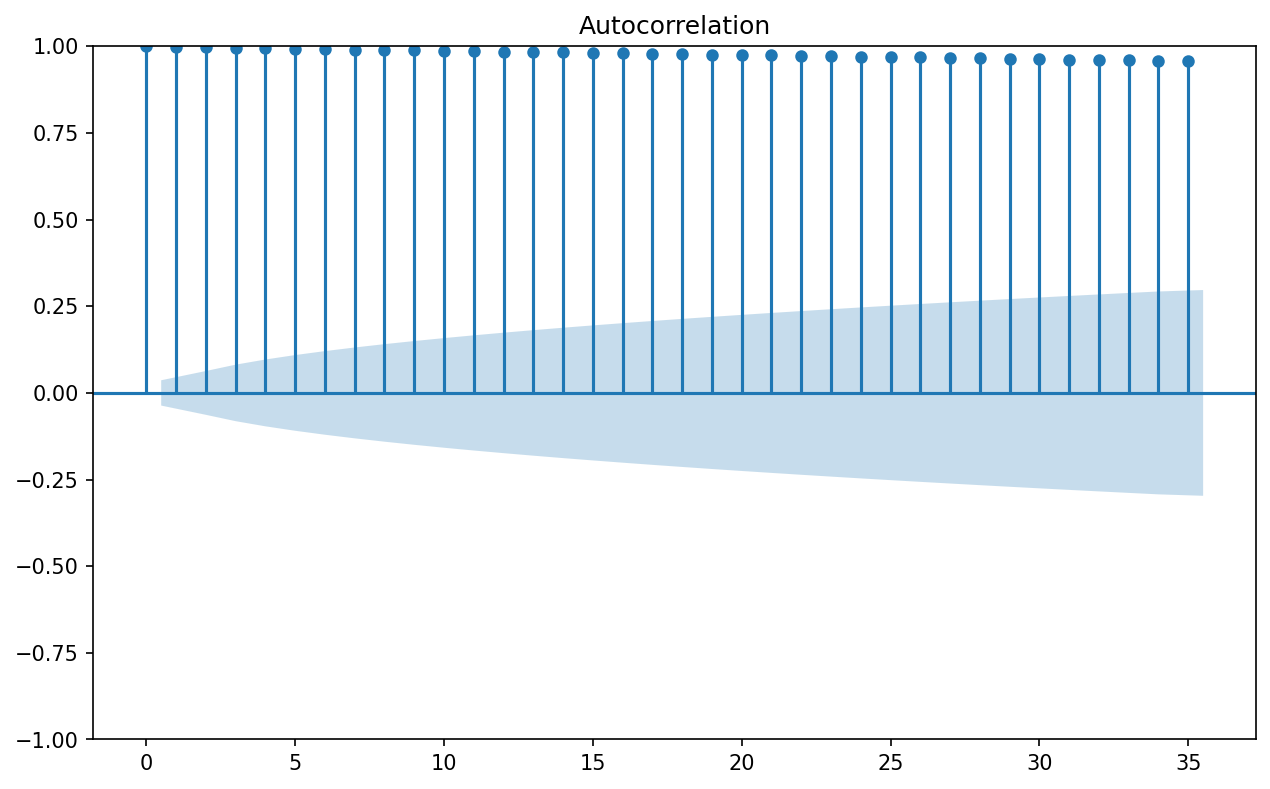

In [16]:
pd.plotting.lag_plot(train_data)
# pd.plotting.autocorrelation_plot(df['Close'])
plot_pacf(train_data)
plot_acf(train_data)
#chuyen doi chuoi dung
# tinh sai bac 1 di lieu train

<Axes: title={'center': 'sai phan bac nhat'}, xlabel='Date'>

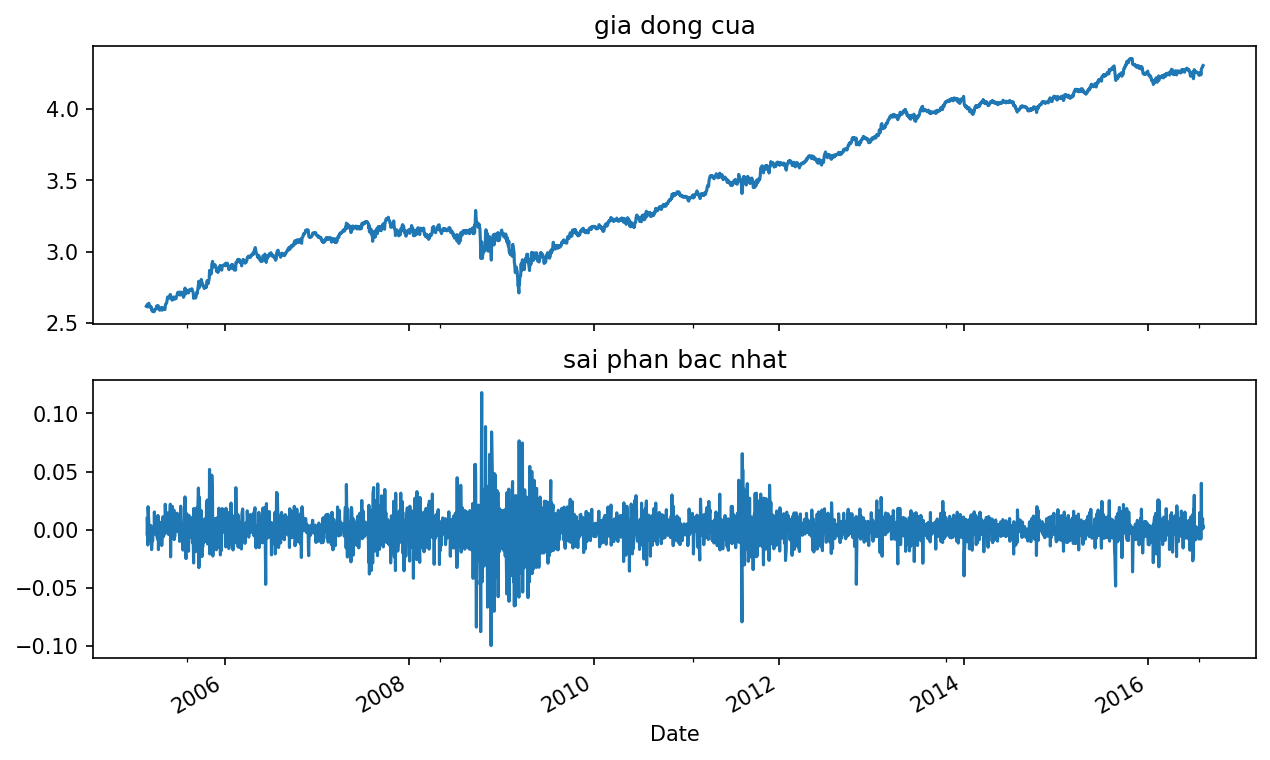

In [17]:
diff = train_data.diff(1).dropna()
# bieu do the hien du lieu ban dau va sau khi lay sai phan
fig,ax = plt.subplots(2,sharex='all')
train_data.plot(ax=ax[0],title='gia dong cua')
diff.plot(ax=ax[1],title='sai phan bac nhat')

reject the null hypothesis (H0), 
the data is stationary.
ADF: Test Statistic      -1.597475e+01
p value                   6.940782e-29
# of Lags                 1.400000e+01
# of Observations         2.864000e+03
Critical Value ({key})   -2.567307e+00
dtype: float64
--------------------------------
fail to reject the null hypothesis (H0), 
the data is stationary.
KPSS: Test Statistic       0.058523
p value                    0.100000
# of Lags                 25.000000
Critical Value ({key})     0.739000
dtype: float64


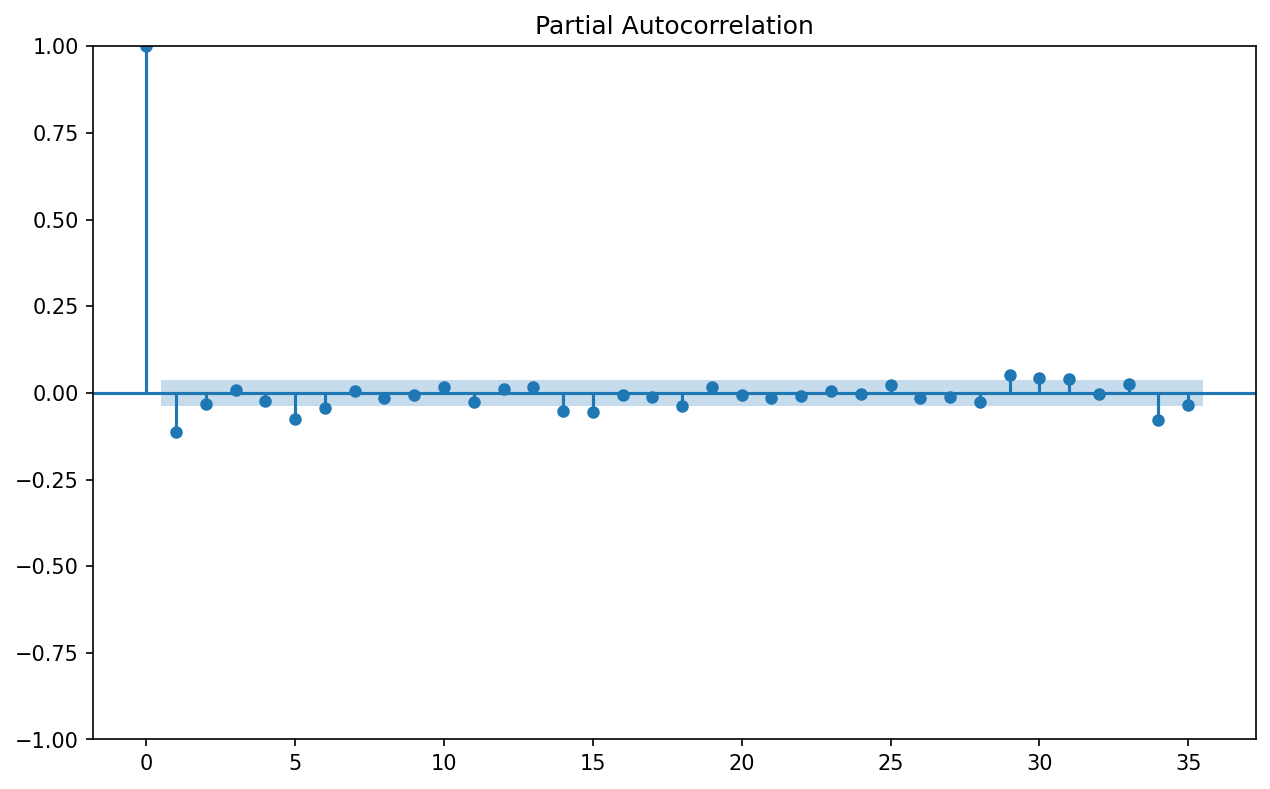

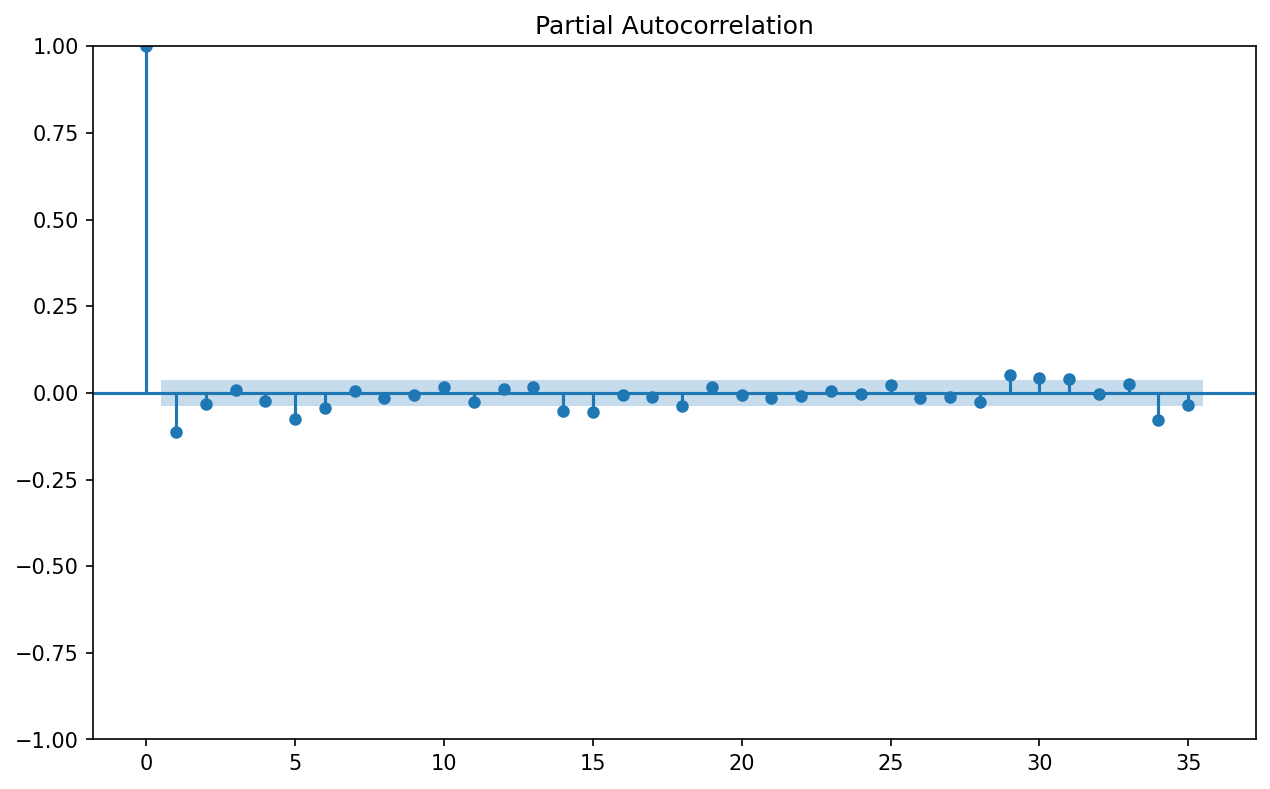

In [18]:
       # check lai tinh dung cua data sau khi lay sai phan
print(adf_test(diff))
print("--------"*4)
print(kpss_test(diff))
plot_pacf(diff) # co the xac dinh tham so 'p' cho mo hinh Arima

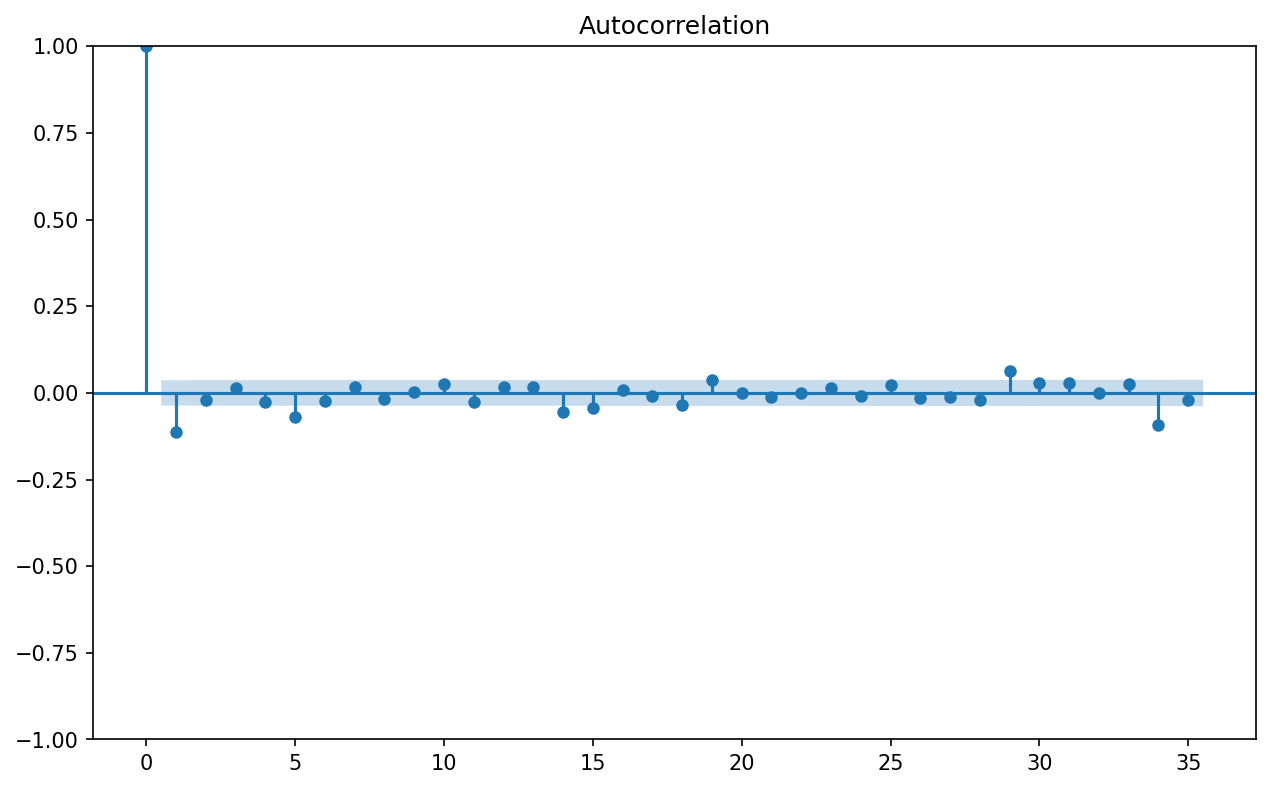

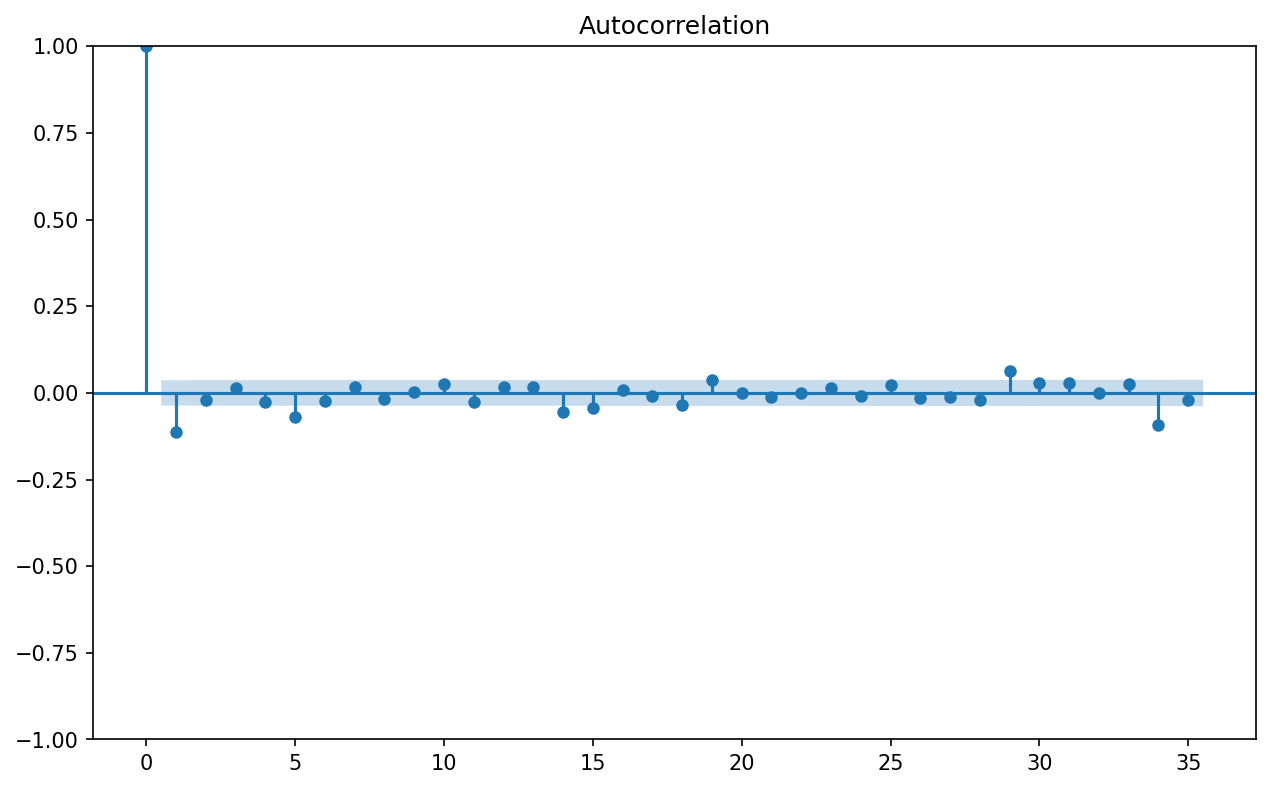

In [19]:
plot_acf(diff) # co the xac dinh tham so 'q' cho mo hinh arima

In [20]:
# xac dinh tham so p,d,q cho mo hinh Arima
stepwise_fit=auto_arima(train_data,trace=True,
                        suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16550.100, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16511.067, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16545.696, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16547.662, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16507.830, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16557.262, Time=1.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16546.796, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16546.834, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-16545.729, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-16544.634, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-16545.077, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-16536.028, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-16547.268, Time=0.38 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 5.553 seco

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2880
Model:                 ARIMA(1, 1, 2)   Log Likelihood                8260.665
Date:                Mon, 03 Mar 2025   AIC                         -16511.330
Time:                        11:03:53   BIC                         -16481.504
Sample:                             0   HQIC                        -16500.579
                               - 2880                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0006   5.73e-05      9.913      0.000       0.000       0.001
ar.L1          0.9696      0.005    202.994      0.000       0.960       0.979
ma.L1         -1.1023      0.011    -97.319      0.0

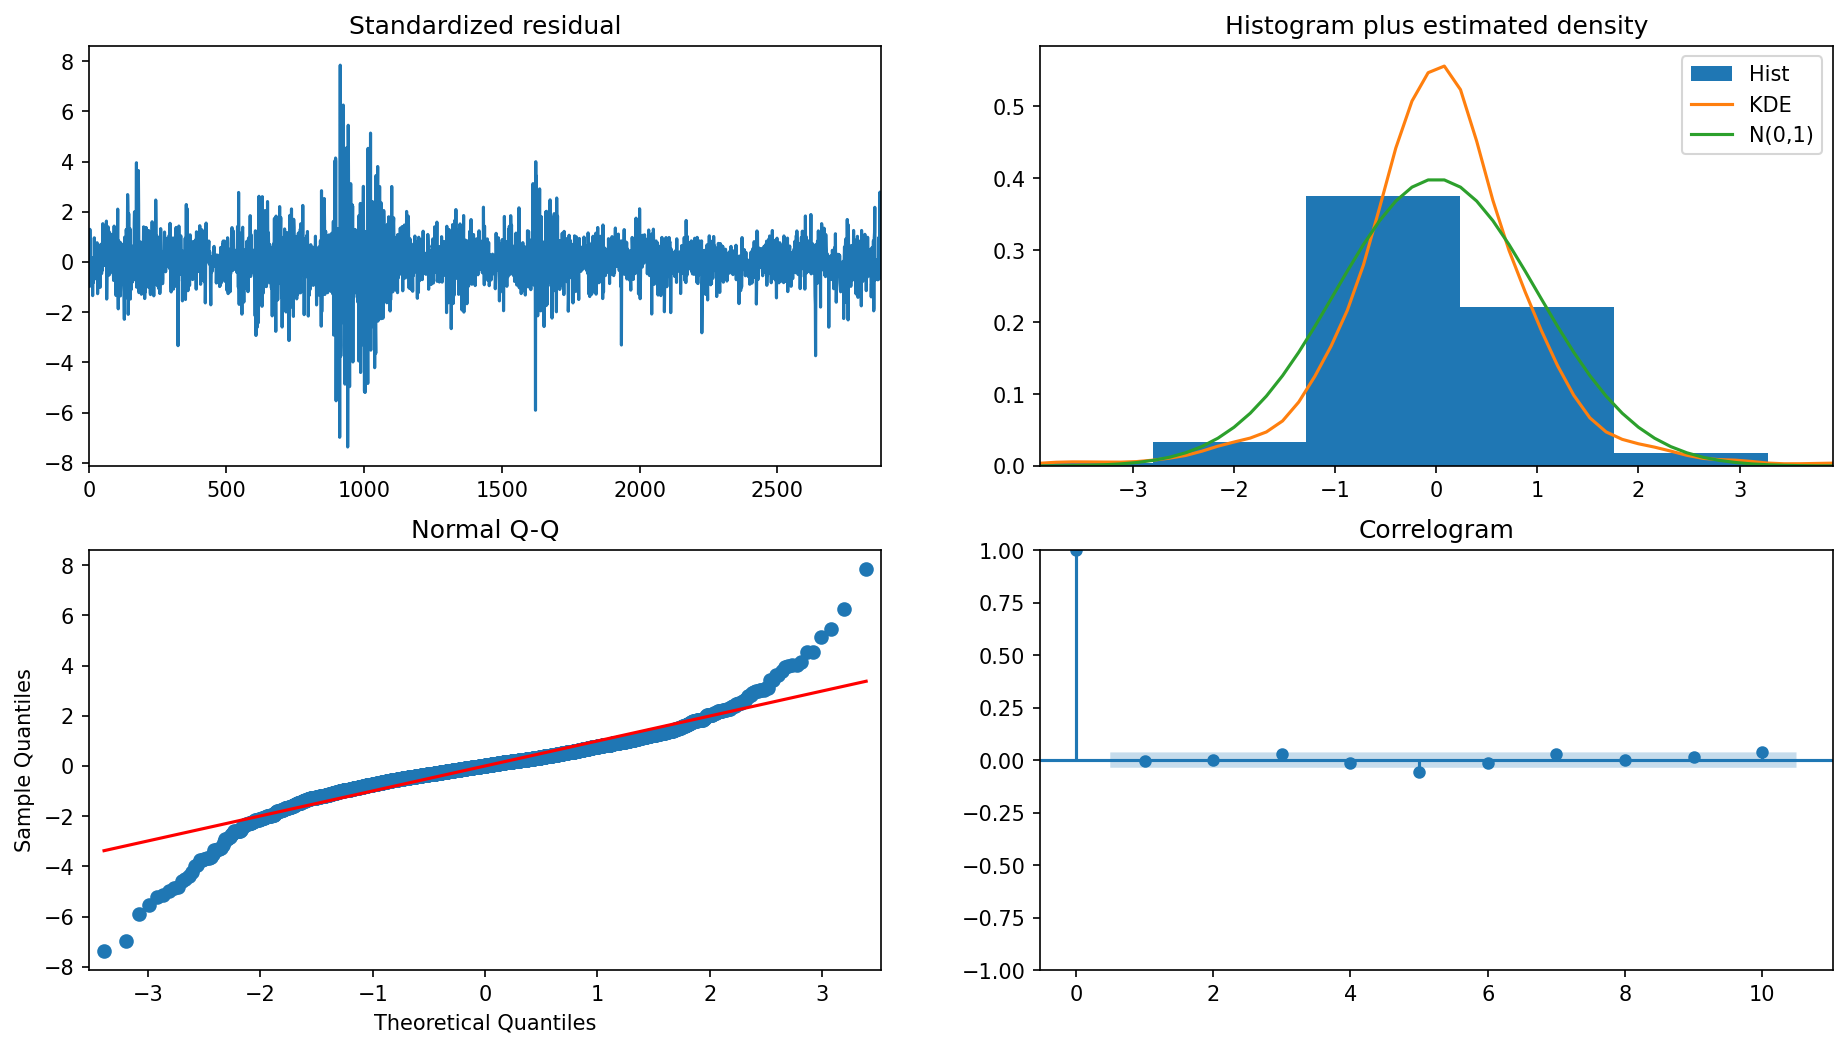

In [21]:
stepwise_fit.plot_diagnostics(figsize=(15,8))
# model = ARIMA(train_data, order=(1,1,2))
# fitted=model.fit(disp=-1)
# fit mo hinh 
model = ARIMA(train_data, order=(1, 1, 2), trend='t')
fitted=model.fit()
print(fitted.summary())

In [23]:
fc= fitted.get_forecast(len(test_data))
fc_val = fc.predicted_mean
fc_val.index = test_data.index
conf = fc.conf_int(alpha = .05)
lower = conf['lower Close']
lower.index = test_data.index
upper =conf['upper Close']
upper.index = test_data.index

In [ ]:
mse = mean_squared_error(test_data,fc_val)
print('test mse:',mse)
rmse = np.sqrt(mse)
print('test RMSE:',rmse)

test mse: 0.011322221812714518
test RMSE: 0.1064059294058114


In [25]:
baseline_pred = np.full_like(test_data, train_data.mean())
baseline_rse = np.sqrt(mean_squared_error(test_data,baseline_pred))

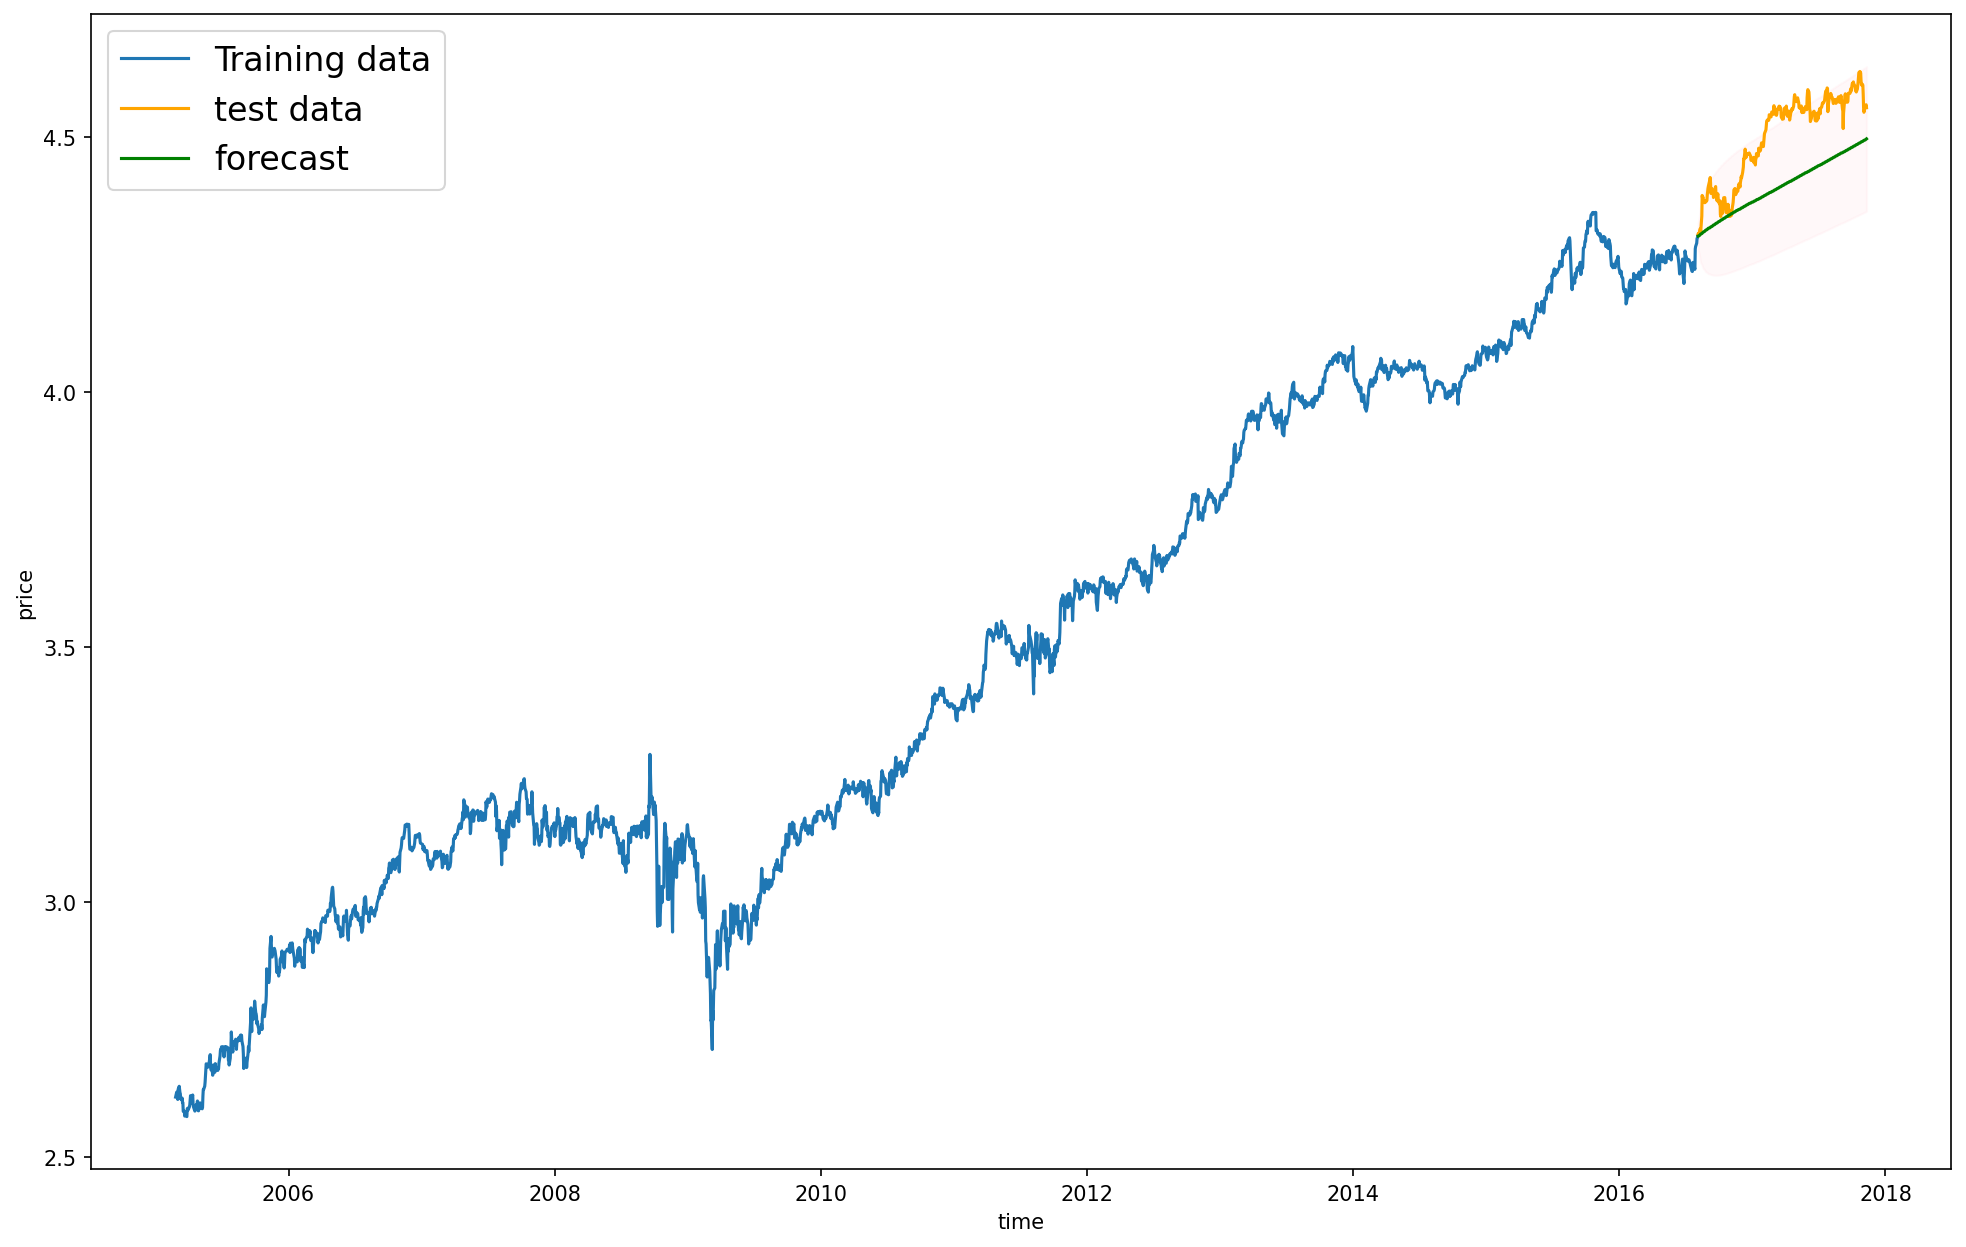

In [26]:
plt.figure(figsize=(16,10),dpi=150)
plt.plot(train_data, label='Training data')
plt.plot(test_data,label = 'test data',color = 'orange')
plt.plot(fc_val,label = 'forecast',color = 'green')
plt.fill_between(lower.index,lower,upper,color='pink',alpha = .1)
plt.xlabel('time')
plt.ylabel('price')
plt.legend(loc= 'upper left',fontsize = 16)
plt.show()

Text(0, 0.5, 'RMSE')

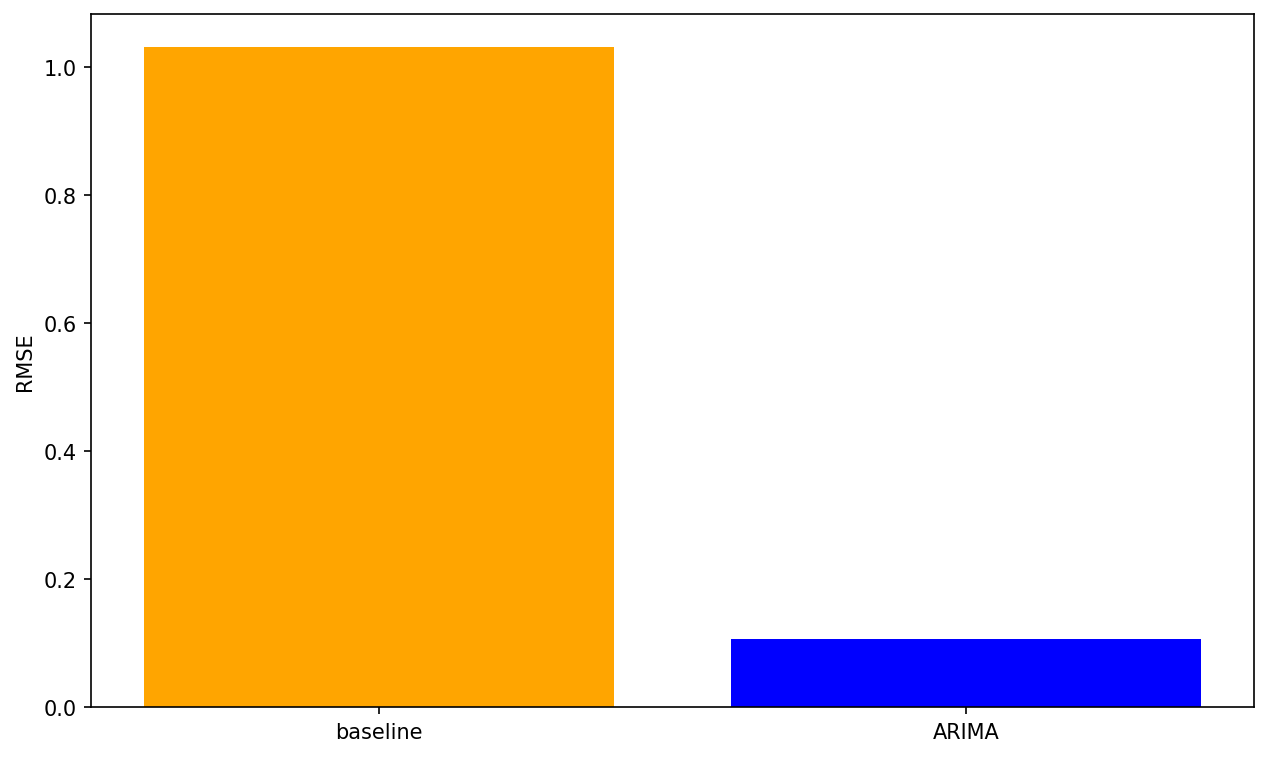

In [29]:
plt.bar(['baseline','ARIMA'],[baseline_rse,rmse],color=['orange','blue'])
plt.ylabel('RMSE')